# Visualization


The visualization of the results of an analysis represents one of the most delicate and important steps in data analysis, and typically tells a lot about the quality of the analysis itself. A good and bad examples are:
   * the discovery of the [Higgs boson](https://twiki.cern.ch/twiki/pub/CMSPublic/Hig13002TWiki/HZZ4l_animated.gif)
   * the claim of [superluminal neutrinos](https://arxiv.org/pdf/1109.4897v1.pdf)

Graphics (plots) should convey as much information as possible, in an intuitive way (should require little or no explanation), and without sacrificing the clarity. There are plenty of examples of bad practices around...

There are essentially two kind of plots you'll ever want to make, histograms and scatter plots.

### Histograms

Histograms are representations of the distribution of a certain feature of the data. Histograms can be thought as scalar functions, $f(x): {\rm I\!R}^n \to {\rm I\!R}$, where at most $n=2$. Histograms are often used to compare different distributions, for instance the data and its expectation (e.g. simulation). 

Histograms are **binned**, which means that the domain is divided in intervals ("bins", or "buckets"), and for the $i$th bin $x_i<x\le x_{i+1}$ and the content of the bin (say $n_i$) is  $n_i=\frac{\int_{x_{i}}^{x_{i+1}} f(x)}{x_{i+1}- x_{i}}$.

Bins doesn't need to have the same size, i.e. it could well be that $(x_{i+1}- x_{i}) \neq (x_{j+1}- x_{j})$ for $i\neq j$.

If the bin size is small, $\lim_{x_{i+1}- x_{i} \to 0} n_i \simeq f(\frac{x_{i+1}+x_{i}}{2})$.



Choosing the number of bins and thus the bin size requires a special care. Typically, the content of each $i$th bin, $n_i$, should be statistically significant, i.e. the corresponding Poisson uncertainty, $1/\sqrt{n_i}$, should be small compared to $n_i$.

In general, the uncertainties affecting the data (or the expectation) should be reported as error bars, especially if the distribution is normalized or comes from a simulation (and thus needs to be weighted).

**Note:** the Poisson uncertainty is valid only for random counts; in all other cases, the appropriate uncertainty should be derived.

#### Shape and Normalization

The are essentially two main quantities that are conveyed by an histogram:

   * The total amount of data, which is referred to as "normalization"
   * The "shape" or differential distribution, which should follow the underlying p.d.f
   
Both quantities can be expressed separately, by quoting $N=\sum_i n_i$ the number of entries and displaying the original bins rescaled by $n_i / N$.

In fact, the definition of normalization factor could be ambiguous; it could either be $N$ or $I=\int f(x) dx$. The former is the most commonly used, but the latter is often the default of built-in methods in several visualization packages.

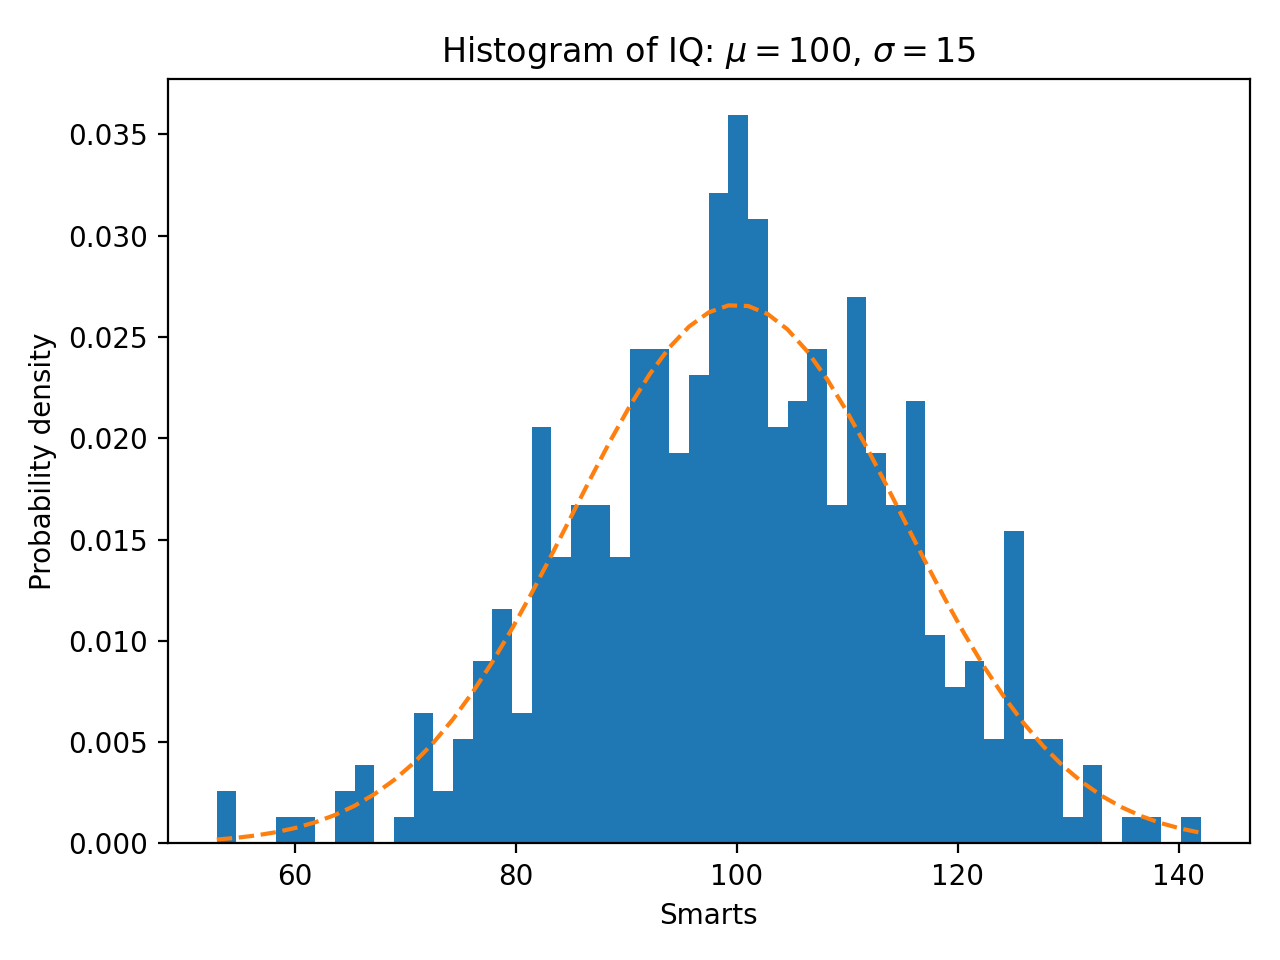

In [1]:
from IPython.display import Image
Image("https://matplotlib.org/stable/_images/sphx_glr_histogram_features_001_2_0x.png", width=600)

### Scatter plots

Scatter plots are used to compare two features, in order to visually detect possible correlations between them. 

Scatter plots can be *unbinned* or *binned*.
- Unbinned scatter plots are often prefered until the number of point isn't too large, after which the plot is not readable anymore. The display of different features is also possible by using a different marker or color for the data points.

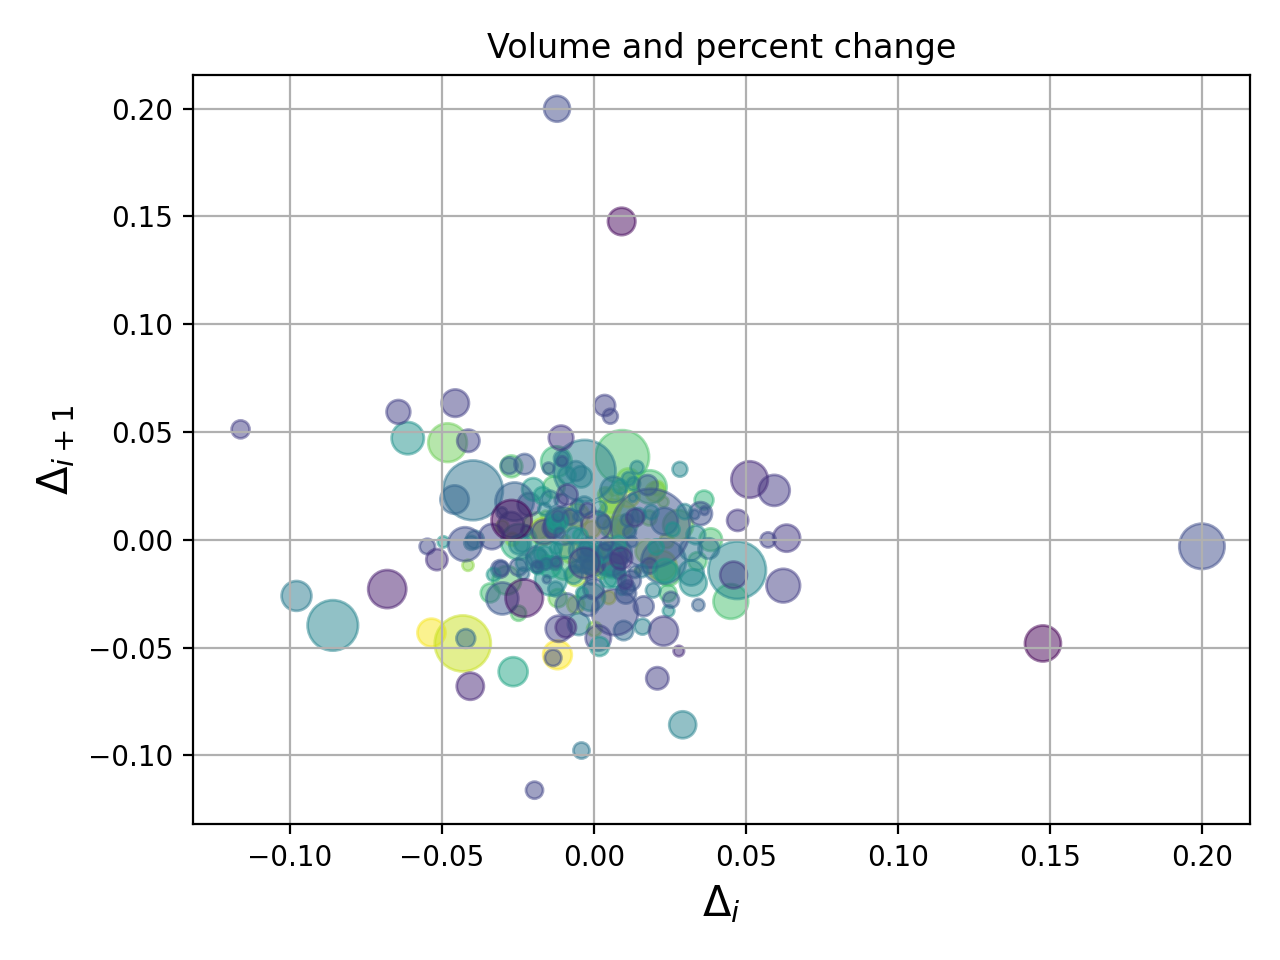

In [2]:
Image("https://matplotlib.org/stable/_images/sphx_glr_scatter_demo2_001_2_0x.png", width=600)

- Binned scatter plots are, as a matter of fact, 2D histograms. The bin content $n_i$ is represented through a color code indicating the "3rd dimension". Alternatively, this can be shown as a "contour plot", i.e. with smoothened edges and color-coded levels.

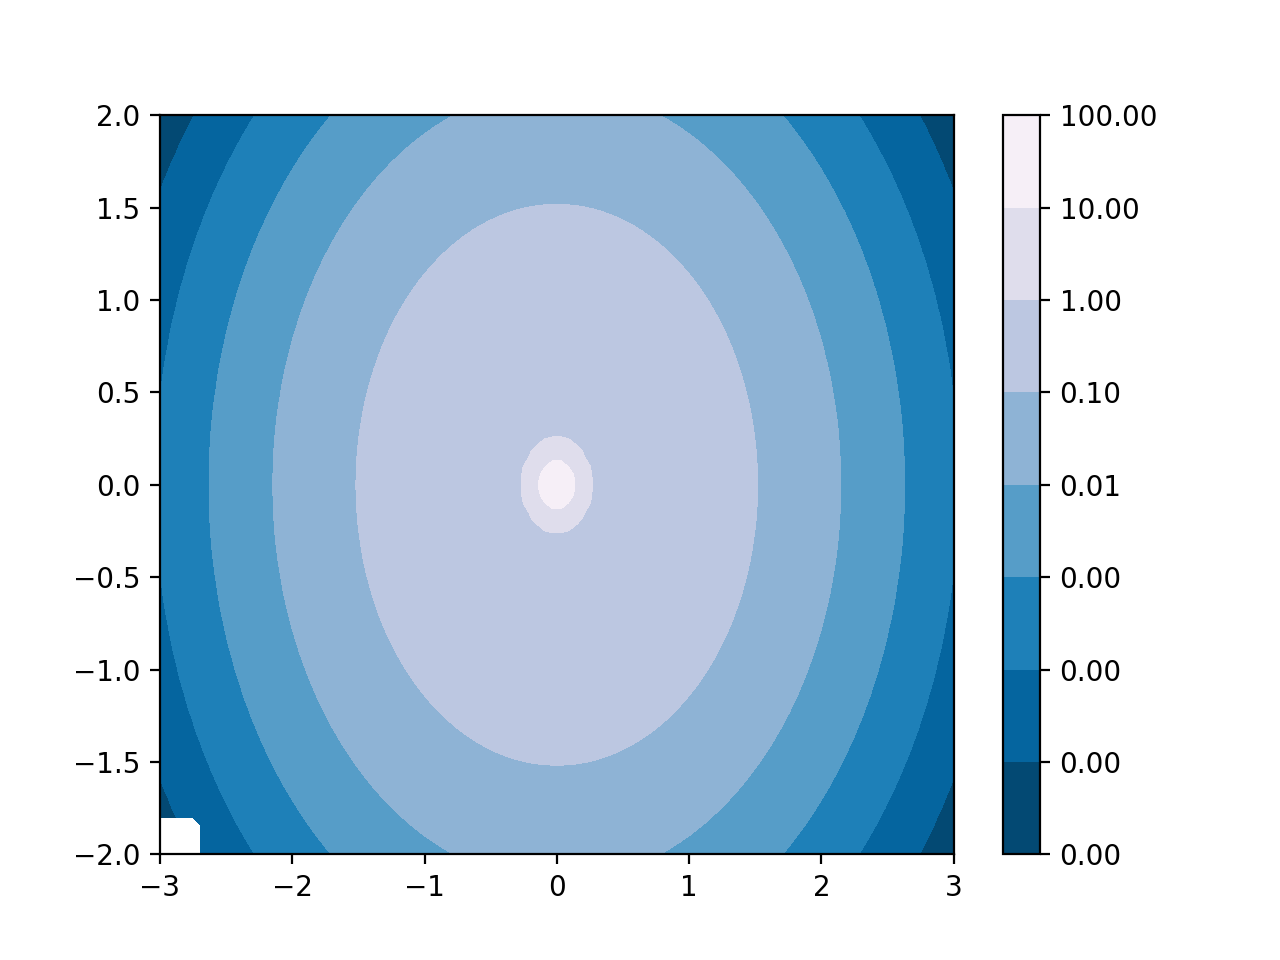

In [3]:
Image("https://matplotlib.org/stable/_images/sphx_glr_contourf_log_001_2_0x.png", width=600)

The condensation of the scatter plots into "profiles" is also very useful. The data are binned along the $x$ (if you had to bin on the other variable, just invert the axes), and for every bin the mean and the standard deviation of the corresponding $y$ values are calculated and reported as data points and their uncertainties, respectively.

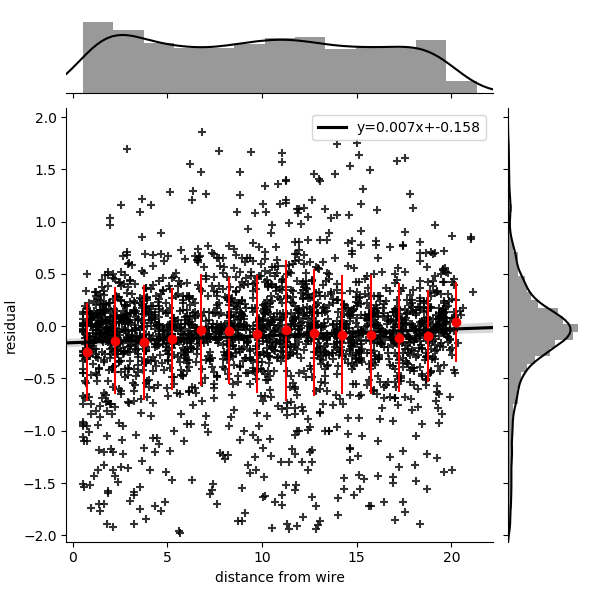

In [4]:
Image("profile.png")

### Other kinds of plots

There are an almost infinite number of other plots, but in some way or another, they can be tracked back to scatter plots and histograms.

A non-exhaustive list can be seen in the [Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show).



## Matplotlib (pyplot)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides an intuitive set of tools to visualize the data, and is well integrated with Python libraries e.g. numpy.
With relatively few commands, it allows everybody to produce readable and high-quality plots.
Link to the [documentation](https://matplotlib.org/stable/index.html).

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import numpy as np

A plot is a container of nested Python objects. A *Figure* object is the outermost container for a matplotlib graphic object, which can contain multiple *Axes* objects. The name can be confusing, as an Axes actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as one might expect).

A Figure object is like a container of one or more Axes (a.k.a. plots). Below the Axes in the hierarchy are individual *Axis*, and smaller objects such as tick marks, individual lines, legends, and text boxes. Every element of a chart is a Python object, which can be manipulated if needed.

In [3]:
from IPython.display import Image
Image(url='https://files.realpython.com/media/fig_map.bc8c7cabd823.png')

<class 'matplotlib.figure.Figure'>


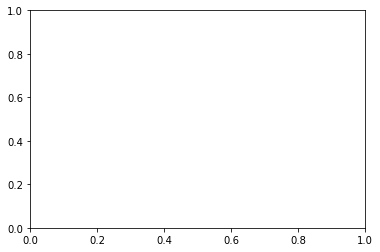

In [5]:
fig, _ = plt.subplots() # create a Figure
print(type(fig))

In the example above, we created two variables with `plt.subplots()`. The first is a top-level Figure object. The second is a “throwaway” variable that we don’t need just yet, denoted with an underscore. Using attribute notation, it is easy to traverse down the figure hierarchy and see the first tick of the y axis of the first Axes object:

[<AxesSubplot:>]
<class 'matplotlib.axis.YTick'>
[0.  0.2 0.4 0.6 0.8 1. ]


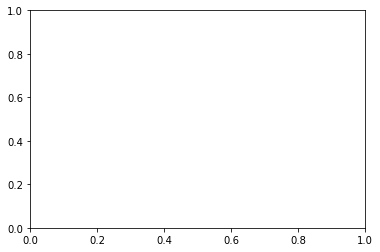

In [6]:
print(fig.axes)
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
print(type(one_tick))
ticks, labels = plt.xticks()
print(ticks)

In the example above, `fig` (an instance of the Figure class) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grab the first one.

Matplotlib documentation presents this as a figure anatomy, rather than an explicit hierarchy:

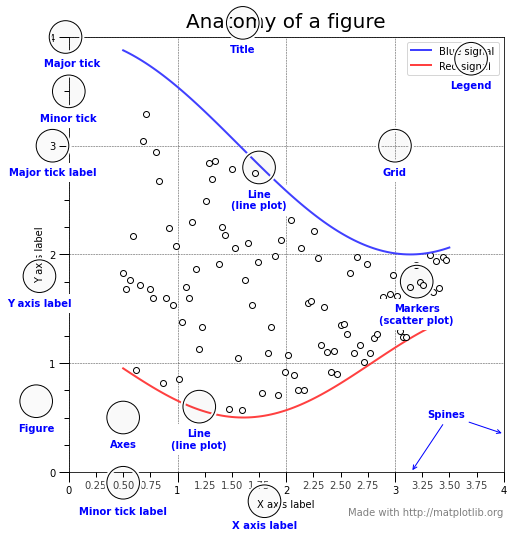

In [7]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

### Stateful Versus Stateless Approaches

There is an important difference between the stateful (state-based, state-machine) and stateless (object-oriented, OO) interfaces.

Above, we used `import matplotlib.pyplot as plt` to import the pyplot module from matplotlib and name it plt.

Almost all functions from pyplot, such as `plt.plot()`, are implicitly either referring to an existing current Figure and current Axes, or creating them anew if they do not exist.

* The **stateful interface** makes its calls with `plt.plot()` and other top-level pyplot functions. There is only one Figure or Axes that you’re manipulating at a given time (and this is the last one created or called), and you don’t need to explicitly refer to it.

* Modifying the underlying objects directly is the **object-oriented** approach. We usually do this by calling methods of an Axes object, which is the object that represents a plot itself.

This all boils down to the definition of `plt.plot()` as:
``` python
# matplotlib/pyplot.py
def plot(*args, **kwargs):
    """An abridged version of plt.plot()."""
    ax = plt.gca()
    return ax.plot(*args, **kwargs)

def gca(**kwargs):
    """Get the current Axes of the current Figure."""
    return plt.gcf().gca(**kwargs)
```

Both approaches have their own advantages and disadvantages.
The steteful approach is convenient for simple plots, while the stateless (object-oriented) approach is typically more customizable and comes in handy as graphs become more complex.

### A few simple examples

1) Lets' start with a simple histogram. In the example below:
   - create the dataset
   - create the fig, axes, etc.
   - use the method of `pyplot.plt` to create and display the histogram in the most recent fig (*stateful approach*)
   - save the relevant histogram quantities, possibly for futher analysis
   - do cosmetic changes to the plot
   - `tight_layout()` applies to the Figure object to clean up whitespace padding

Histogram content: [0.         0.         0.04166667 0.04166667 0.08333333 0.04166667
 0.16666667 0.20833333 0.16666667 0.375      0.33333333 0.16666667
 0.70833333 0.29166667 0.33333333 0.45833333 0.33333333 0.125
 0.08333333 0.16666667 0.04166667 0.         0.         0.
 0.        ]
Bin boundaries: [-3.   -2.76 -2.52 -2.28 -2.04 -1.8  -1.56 -1.32 -1.08 -0.84 -0.6  -0.36
 -0.12  0.12  0.36  0.6   0.84  1.08  1.32  1.56  1.8   2.04  2.28  2.52
  2.76  3.  ]


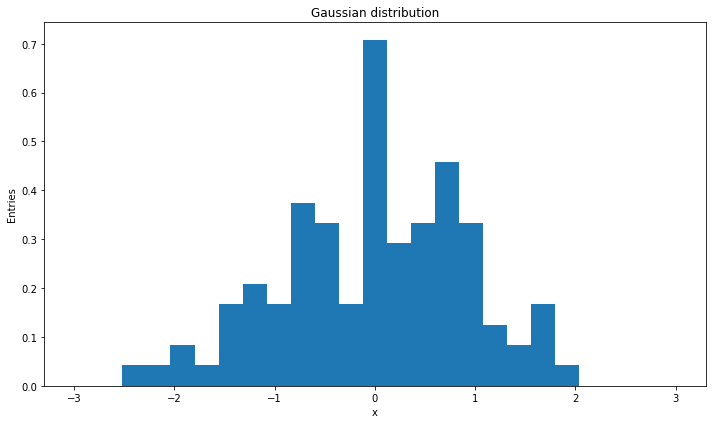

In [8]:
nrnd = np.random.normal(loc=0., scale=1., size=(100,)) # generate 100 random numbers using a Gaussian pdf

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
h, bins, _ = plt.hist(nrnd, bins=25, range=(-3, +3), density=True, cumulative=False) # create and plot the histogram
ax.set_title('Gaussian distribution')
ax.set_xlabel('x')
ax.set_ylabel('Entries')
fig.tight_layout()

# print histogram content and bins
print("Histogram content:", h)
print("Bin boundaries:", bins)

2) A slightly more complex example: stacked histograms. In detail, that's what it is done:

   - create three random time series
   - define one Figure (fig) containing one Axes (a plot, ax)
   - methods of `ax` have been called directly to create a stacked area chart and to add a legend, title, and y-axis label (*stateless approach*). By using the specific `ax` object, there is no ambiguity about which Axes will contain the plot.

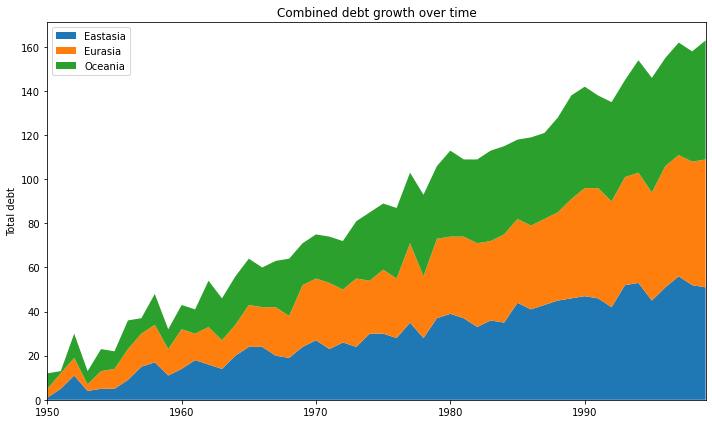

In [9]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size)) # create a 3 x 50 array with random int numbers from 0 to 10
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania']) # create a stack plot, where the 3 components are summed
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(left=yrs[0], right=yrs[-1])
fig.tight_layout()

3) Subplots, scatter plots, and more than one histogram in a plot

   - as a “1x2” Figure is created, the returned result of plt.subplots(1, 2) is now a Figure object and a NumPy array of Axes objects. Alternatively:

``` python
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# ax is now a numpy array of axes's
```

   - we need to do operations on `ax1` and `ax2` individually, which would be difficult to do with the stateful approach. The final line is a good illustration of the object hierarchy, where we are modifying the yaxis belonging to the second Axes, placing its ticks and ticklabels to the right.

   - text inside dollar signs utilizes TeX markup (you can try fancier TeX stuff).

NameError: name 'data' is not defined

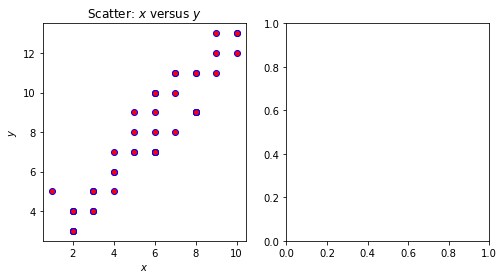

In [10]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)

# create one figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

# either this..
data = np.column_stack((x, y)) # join the two numpy arrays
ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
# ..or this
#ax2.hist(x, bins=np.arange(data.min(), data.max()), label='x', alpha=0.5)
#ax2.hist(y, bins=np.arange(data.min(), data.max()), label='y', alpha=0.5)

ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right() # move the y axis ticks to the right of the plot

4) A more advanced example

Let's consider some data from the housing market in California:

In [11]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

# in this example, you can also see how to access a remote tgz compressed file and read it, all within Python

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [12]:
print(housing)

[[-1.2223e+02  3.7880e+01  4.1000e+01 ...  1.2600e+02  8.3252e+00
   4.5260e+05]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  1.1380e+03  8.3014e+00
   3.5850e+05]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  1.7700e+02  7.2574e+00
   3.5210e+05]
 ...
 [-1.2122e+02  3.9430e+01  1.7000e+01 ...  4.3300e+02  1.7000e+00
   9.2300e+04]
 [-1.2132e+02  3.9430e+01  1.8000e+01 ...  3.4900e+02  1.8672e+00
   8.4700e+04]
 [-1.2124e+02  3.9370e+01  1.6000e+01 ...  5.3000e+02  2.3886e+00
   8.9400e+04]]


Let's extract the area's average home value, which becomes our independent variable $z$, while $pop$ and $age$ are the area's population and average house age, respectively:

In [13]:
z = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [14]:
print(z, '\n', pop, '\n', age)

[452600. 358500. 352100. ...  92300.  84700.  89400.] 
 [ 129. 1106.  190. ...  485.  409.  616.] 
 [8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886]


Let's create a fancy layout by means of `plt.subplot2grid`

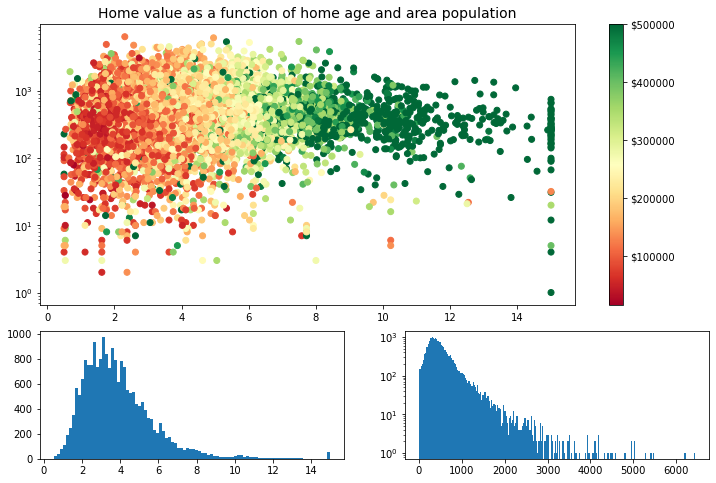

In [15]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
scatter = ax1.scatter(x=age, y=pop, c=z, cmap='RdYlGn') # create the scatter plot in ax1
plt.colorbar(scatter, ax=ax1, format='$%d') # create the color bar on the right (note that we need to specify the ax)
ax1.set_title('Home value as a function of home age and area population', fontsize=14)
ax1.set_yscale('log') # use logarithmic y axis scale

# create the two 1D histograms of single variables
ax2 = plt.subplot2grid(gridsize, (2, 0))
n2, bins2, patches2 = ax2.hist(age, bins='auto')

ax3 = plt.subplot2grid(gridsize, (2, 1))
n3, bins3, patches3 = ax3.hist(pop, bins='auto', log=True)

## Seaborn

Seaborn is a wrapper around matplotlib which makes it better, with a better graphics and advanced functionalities, especially with what concerns statistical analysis.

It allows advanced data and statistical analysis with a very compact synthax, and is very well integrated with Pandas.

Unfortunately, Seaborn is not actively developed anymore, and it's quite rigid in the sense that it's very difficult (or impossible) to do things that were not implemented by the original developer.

In [2]:
import seaborn as sns
#sns.set(style="darkgrid")

### Scatter plots

Let's load some data and start play with it. (Seaborn is nice as it comes with plenty of example datasets you can load as Pandas DataFrames)

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's look at some example of scatter plot in seaborn. `sns.relplot()` (link to [documentation](https://seaborn.pydata.org/generated/seaborn.relplot.html)) is most commonly used, which refers to `sns.scatterplot()`, also available.

Essentialy we want to play with the "extra dimensions" it allows to display. Bear in mind that the more dimensions you put in there, the more difficult the plot results to read.

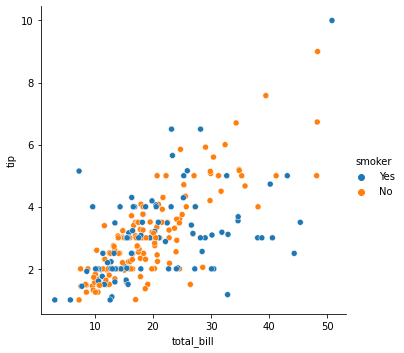

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

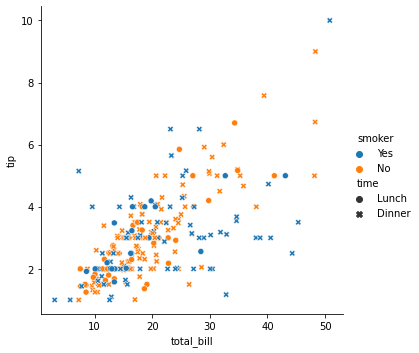

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

Not only categorical but also quantitative "3rd dimension" is of course possible. With color (hue):

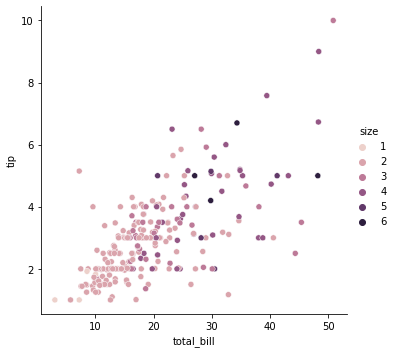

In [6]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

And with marker size:

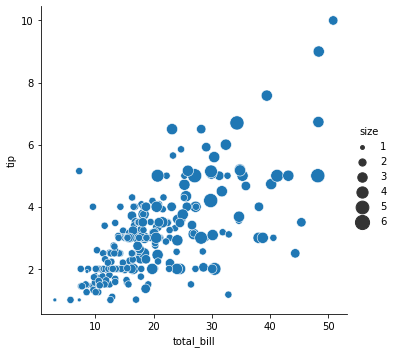

In [7]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

### Histograms

Seaborn provides advanced functionalities with histograms, not just in terms of graphics and visualization, but in terms of statistical analysis too.

<AxesSubplot:ylabel='Count'>

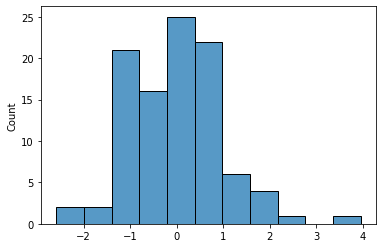

In [12]:
x = np.random.randn(100)
sns.histplot(x=x)

The `displot()` ([documentation](https://seaborn.pydata.org/generated/seaborn.displot.html)) and `histplot()` ([documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html)) methods extend the functionalities of `pyplot.hist()`, for instance can easily provide the kernel density estimate ([KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation)), the individual entries at the bottom of the histogram, and much more.

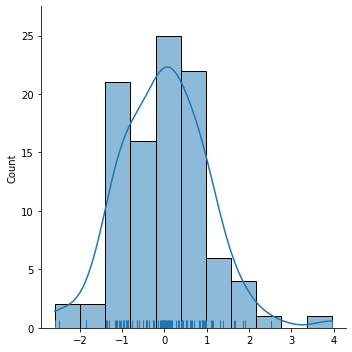

In [13]:
# with unbinned distribution too
sns.displot(x=x, kde=True, rug=True)

### Scatter plots and projections

The `sns.jointplot()` ([documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html)) allows to visualize at the same time both the scatter plot between two features and show their projections along the axes.

In [14]:
import pandas as pd
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 500)
df = pd.DataFrame(data, columns=["x", "y"])

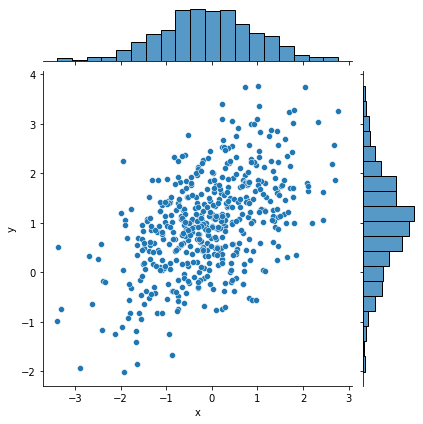

In [15]:
sns.jointplot(x="x", y="y", data=df) # note that you can provide the DataFrame and the names of the columns

<AxesSubplot:xlabel='x', ylabel='y'>

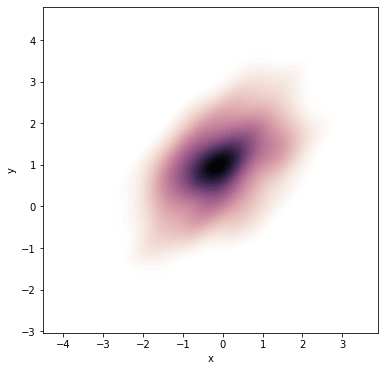

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False) # define color palette
sns.kdeplot(x=df["x"], y=df["y"], cmap=cmap, n_levels=60, shade=True) # alternate method to pass the DataFrame data

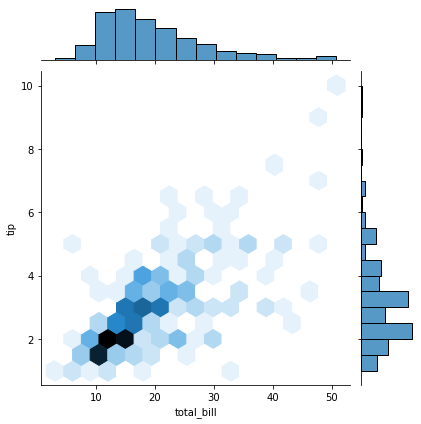

In [17]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

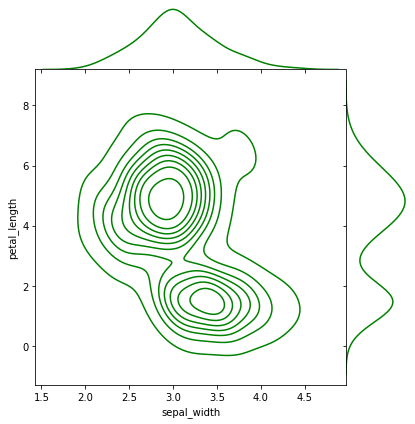

In [18]:
iris = sns.load_dataset("iris") # another well known dataset integrated in Seaborn
g = sns.jointplot(x="sepal_width", y="petal_length", data=iris, kind="kde", space=0, color="g")

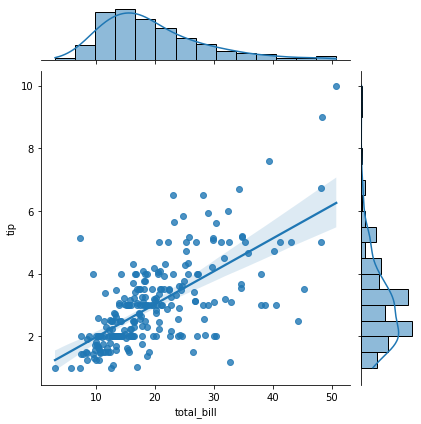

In [19]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

### Chasing correlations

Seaborn allows you to look for correlations systematically checking pair-wise your dataset's features:

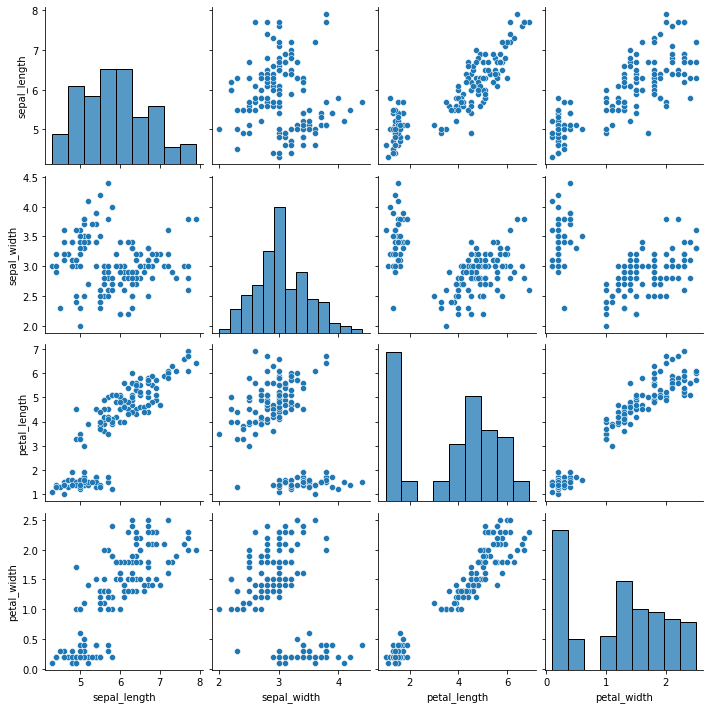

In [20]:
sns.pairplot(iris)

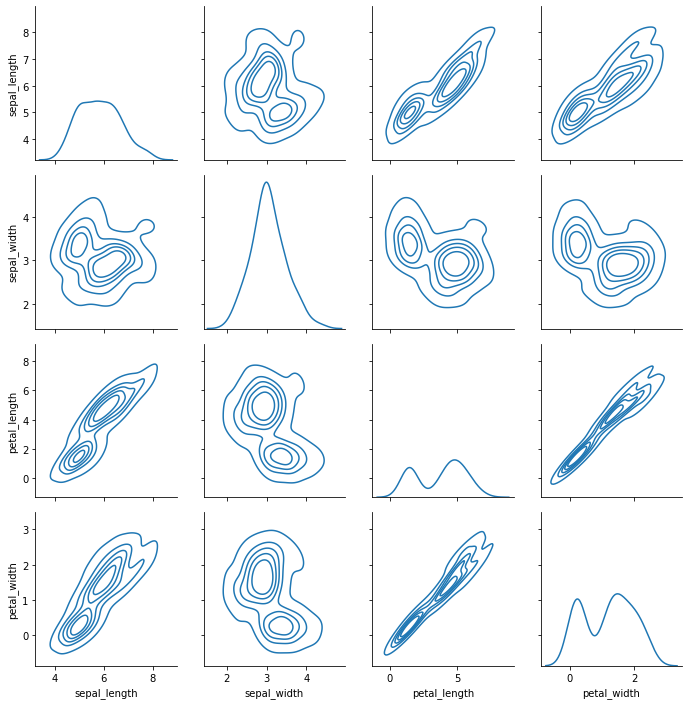

In [21]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

## Plot accessibility (Bokeh, Plotly, etc.)

Often, plots need to be accessible by others from remote, and static formats like `.png` and `.pdf` are not the best option anymore. There are packages, like Bokeh, which are useful to publish plots on web servers.

Other tools like [Dash](https://plot.ly/products/dash/) are extremely powerful and worth checking out.

In [22]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
output_file("log_lines.html")

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend_label="y=x")
p.circle(x, x, legend_label="y=x", fill_color="white", size=8)
p.line(x, y0, legend_label="y=x^2", line_width=3)
p.line(x, y1, legend_label="y=10^x", line_color="red")
p.circle(x, y1, legend_label="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend_label="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)